# Welcome to Tutorial 4!


---

####  **This tutorial shall explore Intervention Policies in [Episimmer](https://github.com/healthbadge/episimmer/tree/master).**



##### Let us perform some initialization first. Due to some version conflicts of some libraries in google colab, you will have to restart runtime after running this cell.

In [ ]:
!pip3 install episimmer

In [ ]:
!git clone https://github.com/healthbadge/episimmer.git
%cd episimmer
from google.colab.patches import cv2, cv2_imshow
from google.colab import _message

# Intervention Policies

---

An Intervention Policy, in Epidemic terms, is a user defined intervention method which applies to any activity undertaken with the objective of improving human health by preventing disease, or reducing the severity or duration of an existing disease.

There are many kinds of policies that can be implemented in Episimmer by the user and it ensures high flexibility. Multiple policies defined by the user can be run in a simulation seamlessly with existing policies. We have also created templates for the user to test different kinds of examples of policies.

Currently, the policies that can be implemented are:

1. Lockdown Policy : Restricts agents from having contact with others
2. Testing Policy : Tests agents to check for disease
3. Vaccination Policy : Vaccinates agents
4. Contact Tracing Policy : Finds contacts of positively tested agents

All policies are implemented in the GeneratePolicy.py file which is a mandatory file for simulation. 




This Tutorial will discuss a few Lockdown policies. There are different types of Lockdown policies in Episimmer. 

I) Full Lockdown : implementing the lockdown policy for all agents

II) Agent-Based Lockdown : Implementing the lockdown policy for agents based on a fixed attribute of the agent

III) Testing-Based Lockdown : Implementing the lockdown policy for agents taking into account their test results. This policy also handles locking down contacts of positively tested agents.

IV) Event-Based Lockdown : Implementing the lockdown policy for events based on a fixed attribute of the event.


In [4]:
# Some helper functions
def read_file(file_name):
  with open(file_name) as f:
    print(f.read())

# Reads the contents of the colab notebook cell. You may also upload your files (for example - Generate_policy.py). 
def get_cell_str(start_string):
  notebook_json_string = _message.blocking_request('get_ipynb', request='', timeout_sec=100)
  for cell in notebook_json_string['ipynb']['cells']:
    if cell['source'][0][:len(start_string)] == start_string:
      return ''.join(cell['source'])
  
  print("Could not find the cell with UserModel.py! Make sure the cell starts with the string you pass at the top of the cell.")

# Full Lockdown


A simple example of a Full Lockdown policy is shown below. The FullLockdown class is used and it takes the parameters - 

- do_lockdown_fn: User-defined function to specify which time step(s) to enforce lockdown in
- p: Probability of agent to contribute and receive infection from any source of infection under lockdown

The first parameter is a function that takes parameter time_step and returns a boolean indicating whether lockdown should occur. We shall ignore the second parameter for now.

In the example below, alternate days are lockdown for all agents.

```python
from episimmer.policy import lockdown_policy

def generate_policy():
    policy_list=[]

    def lockdown_fn(time_step):
        if time_step % 2 == 0:
            return True

        return False

    policy_list.append(lockdown_policy.FullLockdown(lockdown_fn))

    return policy_list
```


### 1. No Lockdown

Let us run this example with no lockdown initially.

In [5]:
!mkdir FullLockdownExample
!cp -a examples/Basic_Disease_Models/Stochastic_SIR/. FullLockdownExample/

In [6]:
# Full Lockdown - No Lockdown

from episimmer.policy import lockdown_policy


def generate_policy():
	policy_list=[]

	return policy_list

In [7]:
gen_policy = get_cell_str("# Full Lockdown - No Lockdown")

with open("FullLockdownExample/Generate_policy.py", "w") as f:
  f.write(gen_policy)


# read_file('FullLockdownExample/Generate_policy.py')

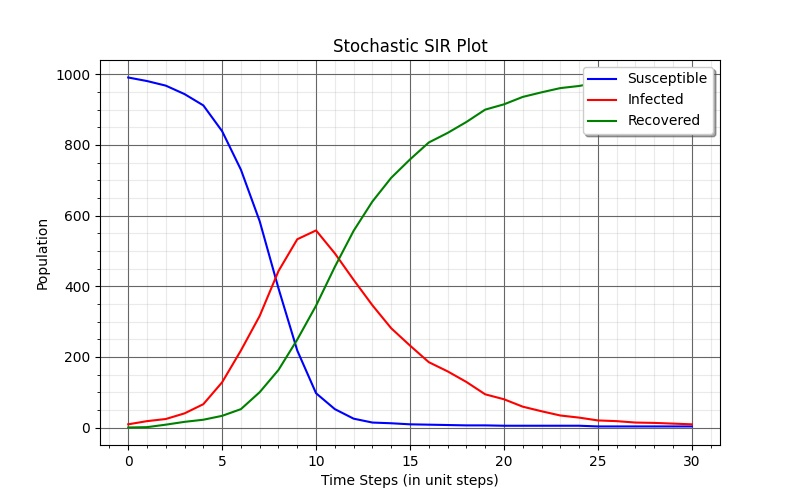

In [8]:
!python3 episimmer/main.py FullLockdownExample -np
cv2_imshow(cv2.imread("FullLockdownExample/results/results.jpg"))

### 2. Full Lockdown - Alternate Days


In [9]:
# Full Lockdown - Alterate Days

from episimmer.policy import lockdown_policy

def generate_policy():
    policy_list=[]

    def lockdown_fn(time_step):
        if time_step % 2 == 0:
            return True

        return False

    policy_list.append(lockdown_policy.FullLockdown(lockdown_fn))

    return policy_list

In [10]:
gen_policy = get_cell_str("# Full Lockdown - Alterate Days")

with open("FullLockdownExample/Generate_policy.py", "w") as f:
  f.write(gen_policy)


# read_file('FullLockdownExample/Generate_policy.py')

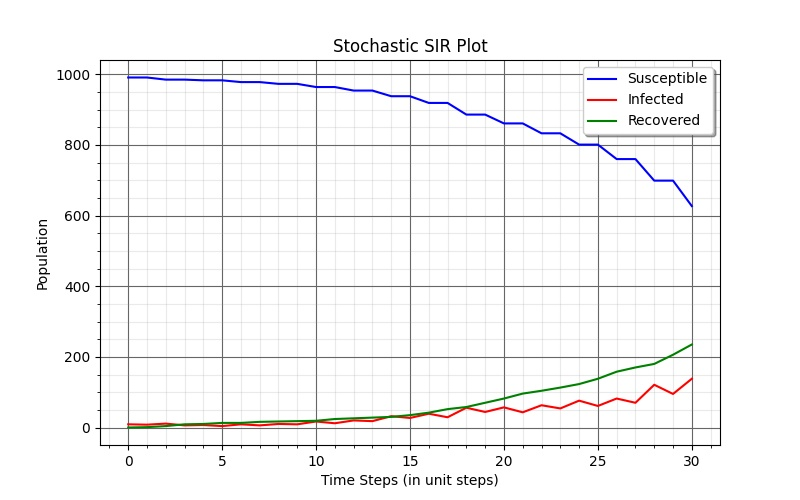

In [11]:
!python3 episimmer/main.py FullLockdownExample -np
cv2_imshow(cv2.imread("FullLockdownExample/results/results.jpg"))

### 3. Full Lockdown - All Days


In [12]:
# Full Lockdown - All Days

from episimmer.policy import lockdown_policy

def generate_policy():
    policy_list=[]

    def lockdown_fn(time_step):
      return True


    policy_list.append(lockdown_policy.FullLockdown(lockdown_fn))

    return policy_list

In [13]:
gen_policy = get_cell_str("# Full Lockdown - All Days")

with open("FullLockdownExample/Generate_policy.py", "w") as f:
  f.write(gen_policy)


# read_file('FullLockdownExample/Generate_policy.py')

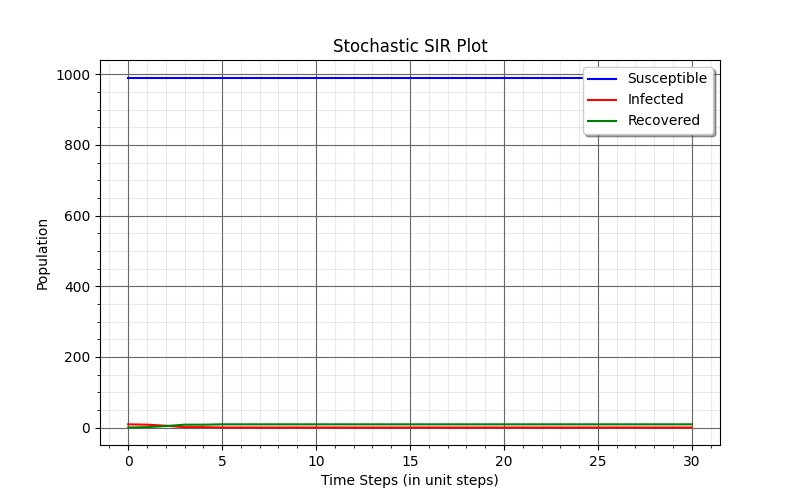

In [14]:
!python3 episimmer/main.py FullLockdownExample -np
cv2_imshow(cv2.imread("FullLockdownExample/results/results.jpg"))

# Agent-Based Lockdown


For Agent-Based Lockdowns, the AgentLockdown class is used and it takes the parameters - 

- attribute: Parameter (attribute) type of agents
- value_list: List of attribute values of agents
- do_lockdown_fn: User-defined function to specify which time step(s) to enforce lockdown in
- p: Probability of agent to contribute and receive infection from any source of infection under lockdown

The first and second parameter decides the agents that are to be lockdown. The third and fourth parameters are the same as the ones in FullLockdown class.

In the example below, agents of Grade 'Grade 1' are lockdown

```python
from episimmer.policy import lockdown_policy

def generate_policy():
    policy_list=[]

    def lockdown_fn(time_step):
        return True

    policy_list.append(lockdown_policy.AgentLockdown('Grade',['Grade 1'],lockdown_fn))

    return policy_list

```


### 1. No Lockdown

Let us run this example with no lockdown initially.

In [15]:
!mkdir AgentLockdownExample
!cp -a examples/Policy/Sample_Campus/. AgentLockdownExample/

In [16]:
# Agent Lockdown - No Lockdown

from episimmer.policy import lockdown_policy


def generate_policy():
	policy_list=[]

	return policy_list

In [17]:
gen_policy = get_cell_str("# Agent Lockdown - No Lockdown")

with open("AgentLockdownExample/Generate_policy.py", "w") as f:
  f.write(gen_policy)


# read_file('AgentLockdownExample/Generate_policy.py')

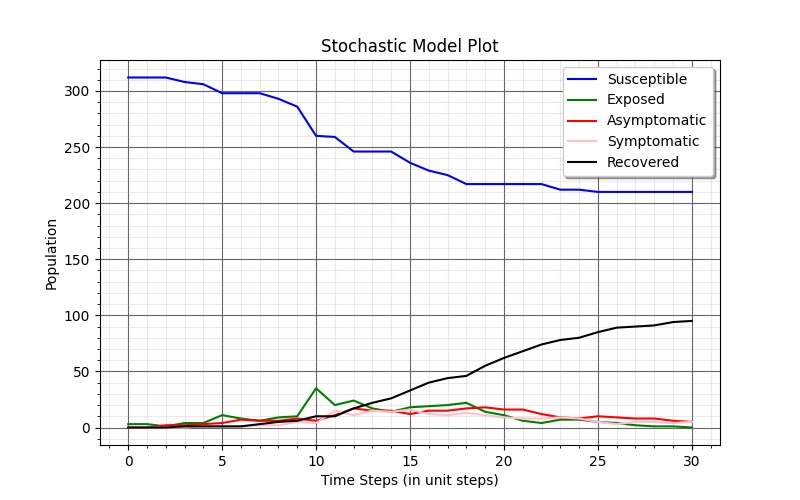

In [18]:
!python3 episimmer/main.py AgentLockdownExample -np
cv2_imshow(cv2.imread("AgentLockdownExample/results/results.jpg"))

### 2. Agent Lockdown - Grade 1 Agents 


In [19]:
# Agent Lockdown - Grade 1 Agents

from episimmer.policy import lockdown_policy

def generate_policy():
    policy_list=[]

    def lockdown_fn(time_step):
        return True

    policy_list.append(lockdown_policy.AgentLockdown('Grade',['Grade 1'],lockdown_fn))

    return policy_list

In [20]:
gen_policy = get_cell_str("# Agent Lockdown - Grade 1 Agents")

with open("AgentLockdownExample/Generate_policy.py", "w") as f:
  f.write(gen_policy)


# read_file('AgentLockdownExample/Generate_policy.py')

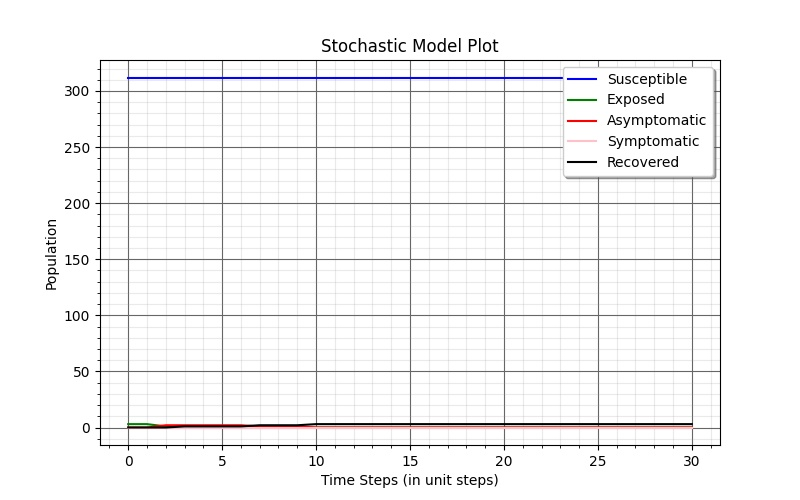

In [21]:
!python3 episimmer/main.py AgentLockdownExample -np
cv2_imshow(cv2.imread("AgentLockdownExample/results/results.jpg"))

### Disclaimer : These colab tutorials are only for reference and they are in no way representative of the entire functionality of Episimmer. Please look at the [Documentation](https://episimmer.readthedocs.io/en/latest/) for more details.